#### İsmail GÜZEL  509182203
# Class $c_1$ and $c_2$ with Gaussian noise for the mean $\mu=0$ and the standart deviation $\sigma=0.1$

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import svm
import math

In [2]:
c1_class = pd.read_csv("C1_pts.csv", skiprows= 3 , header =None, sep= "\s+",names= ["x_1","x_2"])
c2_class = pd.read_csv("C2_pts.csv", skiprows= 3 , header =None, sep= "\s+",names= ["x_1","x_2"])
c1_class["Class"]="1"
c2_class["Class"]="2"
dataset=c1_class.append(c2_class, ignore_index= True)
dataset.describe()

,x_1,x_2
count,200.000000,200.000000
mean,1.042867,0.915599
std,1.409634,1.421630
min,-2.944300,-2.329900
25%,0.066200,-0.180900
50%,1.053950,0.851200
75%,2.117150,1.961000
max,4.508800,4.789100


We generate the number of 200 noise with Gausian $\mu=0$ and $\sigma=0.1$.

Then we add the noise to the clean dataset for all feature spcaces

In [8]:
noise = np.random.normal(0,math.sqrt(1),200)
datanoise1= dataset["x_1"]+ noise
datanoise2 = dataset["x_2"]+ noise
datanoise=pd.concat([datanoise1,datanoise2], axis=1)
datanoise.describe()

,x_1,x_2
count,200.000000,200.000000
mean,0.974250,0.846982
std,1.724259,1.734526
min,-4.044342,-3.695055
25%,-0.207272,-0.407853
50%,1.086208,0.887714
75%,2.250277,1.970016
max,5.403822,5.133093


In [9]:
clf = svm.SVC(kernel='linear', C = 1)
clf.fit(datanoise,dataset["Class"])

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [10]:
w = clf.coef_[0]
print(w)
print(clf.intercept_[0])

x1 = np.linspace(-3,5)
x2 = (-w[0] / w[1] ) * x1 - clf.intercept_[0] / w[1]

[0.46839393 0.67007668]
-0.9795113262652203


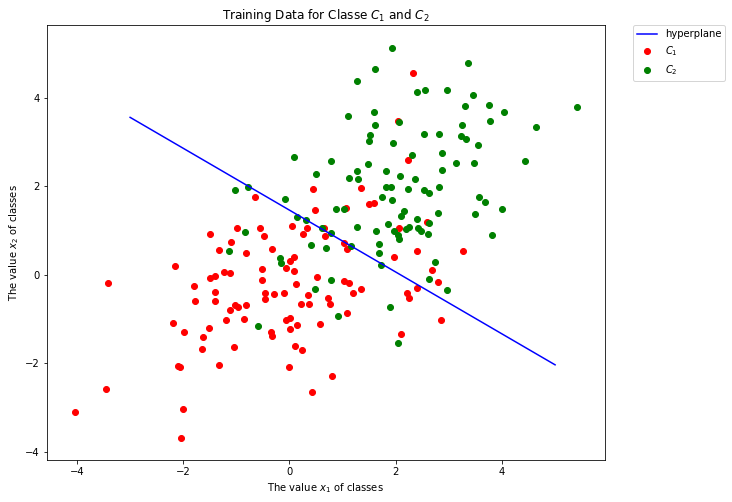

In [11]:
fig= plt.figure(figsize=(10,8))
plt.plot(x1, x2, 'b-', label="hyperplane") 
                            
plt.scatter(datanoise["x_1"][:100], datanoise["x_2"][:100],color="r" , label = "$C_1$")
plt.scatter(datanoise["x_1"][100:], datanoise["x_2"][100:],color="g",  label = "$C_2$")

plt.xlabel("The value $x_1$ of classes")
plt.ylabel("The value $x_2$ of classes")
plt.title("Training Data for Classe $C_1$ and $C_2$")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()